--2020-12-08 01:13:41--  https://uta.instructure.com/courses/61673/files/10505095/preview?verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps
Resolving uta.instructure.com (uta.instructure.com)... 34.224.181.213, 54.145.38.170, 52.21.165.220
Connecting to uta.instructure.com (uta.instructure.com)|34.224.181.213|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://a13430-10505095.cluster38.canvas-user-content.com/courses/13430~61673/files/13430~10505095/course%20files/public_files/2018-2019_NBA_stats.csv?download=1&inline=1&verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps [following]
--2020-12-08 01:13:41--  https://a13430-10505095.cluster38.canvas-user-content.com/courses/13430~61673/files/13430~10505095/course%20files/public_files/2018-2019_NBA_stats.csv?download=1&inline=1&verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps
Resolving a13430-10505095.cluster38.canvas-user-content.com (a13430-10505095.cluster38.canvas-user-content.com)... 52.22.206.196, 3

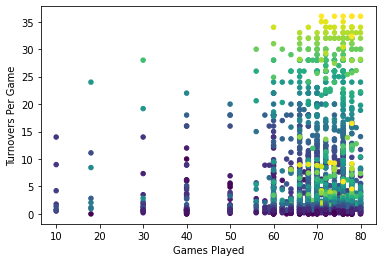

                       Cluster ID
Player                           
James Harden                    1
Giannis Antetokounmpo           1
Stephen Curry                   1
Karl-Anthony Towns              1
Anthony Davis                   1
...                           ...
Chris Boucher                   2
Richaun Holmes                  2
Jusuf Nurkic                    2
Jordan McRae                    2
DeMarcus Cousins                2

[300 rows x 1 columns]


,Games Played,Minutes Per Game,Points Per Game,Total Rebounds Per Game,Assists Per Game,Three Points Made Per Game,Steals Per Game,Block Per Game,Turnover Per Game
0,67.656000,20.952000,8.864208,4.289744,1.926120,0.941640,0.675360,0.518128,1.072024
1,73.335404,29.956522,16.692447,6.098112,3.683571,1.664348,1.063075,0.742323,1.943565
2,37.714286,17.571429,7.883143,3.796286,1.725000,0.817500,0.675000,0.628429,0.978500


In [167]:
!wget -O 2018-2019_NBA_Stats.csv https://uta.instructure.com/courses/61673/files/10505095/preview?verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps

import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import cdist, pdist, euclidean
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import scale
from sklearn import cluster



stats_file = '/content/2018-2019_NBA_Stats.csv'
nba = pd.read_csv(io.FileIO(stats_file))
nba



#compute SSE
#elbow chart to decide k

frame =nba.iloc[:,3:12].values

ax  = plt.gca()
columns = nba.columns
for col in columns[4:]:
    nba.plot.scatter(x=columns[3], y=col, c=col, colormap='viridis',
        ax=ax, colorbar=False)
plt.show()

#frame = pd.DataFrame(x, columns=['Games Played','Minutes Per Game', 'Points Per Game', 'Total Rebounds Per Game', 'Assists Per Game', 'Three Points Made Per Game', 'Steals Per Game','Block Per Game', 'Turnover Per Game'])
#x = scale (x)
data = nba.drop('Position',axis =1 )
data = nba.drop('Team',axis =1 )
data = nba.drop('Player',axis =1 )
#player = nba['Player']
#nba = nba.mean()
k_means = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
k = k_means.fit(frame) 
labels = k_means.labels_
pd.DataFrame(labels, index=nba.Player, columns=['Cluster ID'])




print (pd.DataFrame(labels, index=nba.Player, columns=['Cluster ID']))
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=['Games Played','Minutes Per Game', 'Points Per Game', 'Total Rebounds Per Game', 'Assists Per Game', 'Three Points Made Per Game', 'Steals Per Game','Block Per Game', 'Turnover Per Game'])
















#print(k_means.labels_)













